In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [4]:
X, y= make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

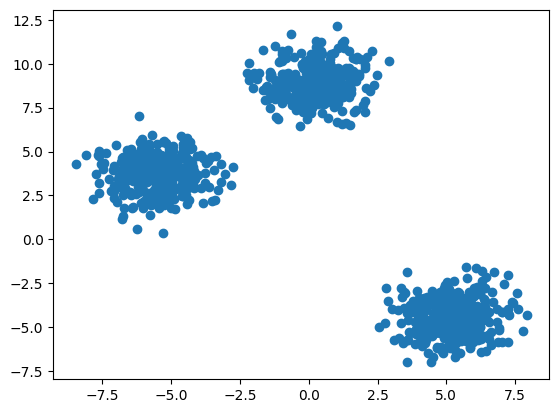

In [8]:
plt.scatter(X[:,0], X[:,1]) #c=y

In [9]:
X.shape

(1000, 2)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.cluster  import KMeans

In [12]:
## Manual process
## Elbow method to select K value

wcss = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)


In [13]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1171.9057781134252,
 1034.389151373223,
 854.9752071174945,
 761.8881848286665,
 692.2883674337879,
 642.1522282043591,
 588.6225645469749]

Text(0, 0.5, 'WCSS')

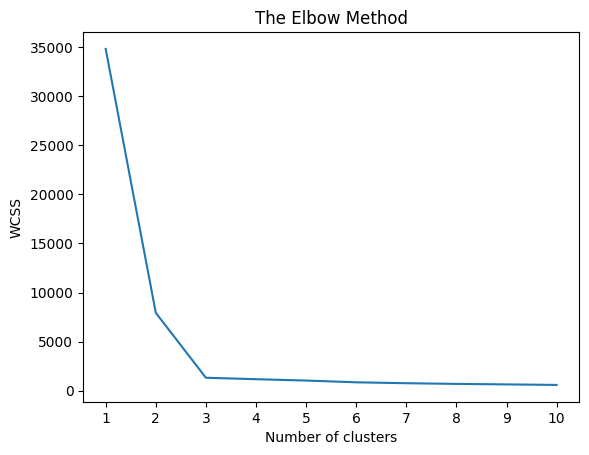

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_train_labels = kmeans.fit_predict(X_train)

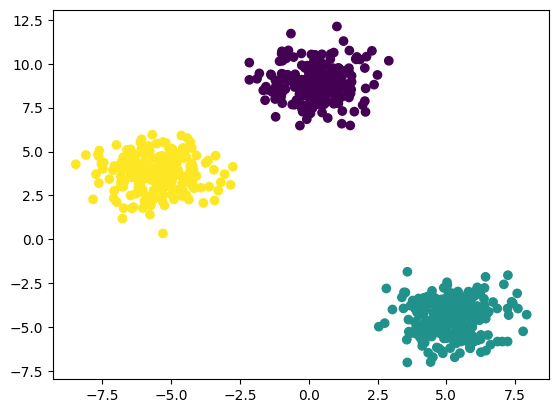

In [17]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_labels)

In [18]:
y_test_labels = kmeans.predict(X_test)

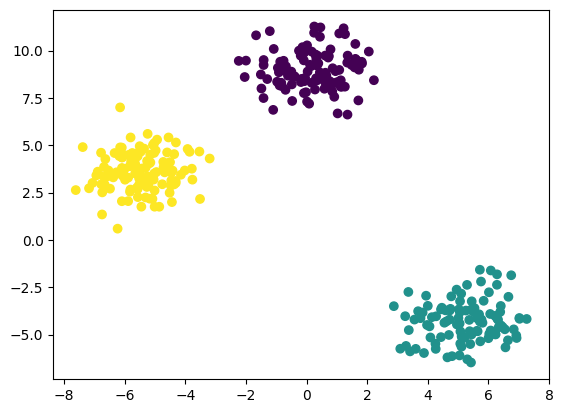

In [19]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_labels)

In [21]:
## knee locator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [23]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

3

In [24]:
## Performance metrics
## Silhouette score

from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coefficients.append(score)


In [26]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6519643024137518,
 0.5065604481526464,
 0.33546405990172856,
 0.3383936534393026,
 0.3352184670810117,
 0.3307528674230801,
 0.34379453489845846]

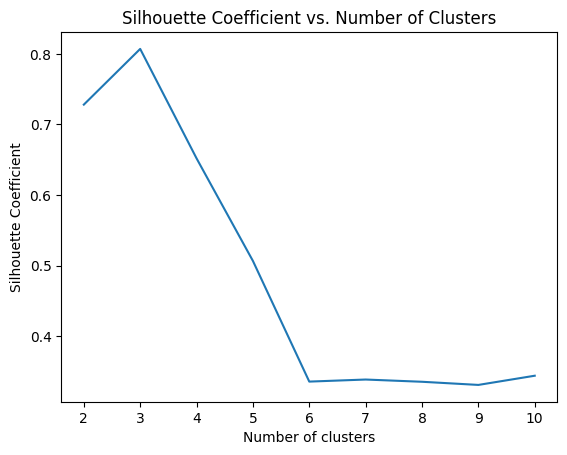

In [29]:
## plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs. Number of Clusters')
plt.show()